# Dataset Exploration

## Basic

Read the data into a pandas dataframe, check the shape of the data, and look at the first few rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from  pysentimiento import SentimentAnalyzer
import unicodedata
import miniut
from miniut import console
import wordcloud
import re

In [2]:
console.init()
versions = [['pandas:', pd.__version__],
            ['numpy:', np.__version__],
            ['matplotlib:', matplotlib.__version__],
            ['seaborn:', sns.__version__],
            ['nltk:', nltk.__version__],
            ['miniut:', miniut.__version__],
            ['wordcloud:', wordcloud.__version__]
            ]
console.print_matrix(versions, style='semibox', header=['Library', 'Version'], indexes=None)

      Library      Version   
   --------------------------
 |    pandas:       1.4.2    
 |    numpy:       1.22.4    
 |  matplotlib:     3.5.2    
 |   seaborn:      0.11.2    
 |     nltk:         3.7     
 |    miniut:       0.1.0    
 |  wordcloud:      1.8.1    



In [3]:
data = pd.read_csv('data/spanish_tweets_suggesting_signs_of_depression_v1.csv')
data

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT
0,1,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017
1,2,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017
2,3,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017
3,4,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017
4,5,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017
...,...,...,...,...
995,996,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018
996,997,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018
997,998,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017
998,999,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TWEET_ID_ANON  1000 non-null   int64 
 1   USER_ID_ANON   1000 non-null   int64 
 2   TWEET_TEXT     1000 non-null   object
 3   CREATED_AT     1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [5]:
data.drop('TWEET_ID_ANON', axis=1, inplace=True)
data

,USER_ID_ANON,TWEET_TEXT,CREATED_AT
0,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017
1,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017
2,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017
3,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017
4,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017
...,...,...,...
995,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018
996,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018
997,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017
998,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018


## Analysis of words in tweets

First of all, we need to normalize the words in the tweets, and transform misspelled words into correct words, and then delete the stopwords, to finally create a WordCloud

In [6]:
data['TWEET_TEXT_NORMALIZED'] = data['TWEET_TEXT'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
data

,USER_ID_ANON,TWEET_TEXT,CREATED_AT,TWEET_TEXT_NORMALIZED
0,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017,deberian eliminar a las malas personas y a los...
1,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017,ya deja de intentar contarle tus problemas a a...
2,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017,la tristeza es lo mas facil de ocultar de todo...
3,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017,de las peores cosas de la depresion es que no ...
4,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017,la soledad es lo unico constante en mi vida. c...
...,...,...,...,...
995,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018,de nuevo vacio
996,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018,soy gay soy gay soy gay soy gay soy putamente ...
997,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017,cansado si muy cansado de todo de la gente y d...
998,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018,la vida me mataa


In [7]:
letters: str = 'abcdefghijklmnopqrstuvwxyz '
exclude_words: list[str] = ['externallink', '  ', '\n']

dictionary: dict[str, str] = {'irmeeeeeeeee' : 'irme',
                              'depresionladepresionesmulticolor' : 'depresion la depresion es multicolor',
                              'sentidotengo' : 'sentido tengo',
                              'vivirya' : 'vivir ya',
                              'llorellore ' : 'llore llore',
                              'tengoestabilidad' : 'tengo estabilidad',
                              'depresivacomplicadacelosagritonaexhaustivainsistenteproblematicai' : 'depresiva complicada los agritona exhaustiva insistente problematica',
                              'asiinseguramolesta' : 'asi insegura molesta',
                              'salidahabia' : 'salida habia',
                              'xq' : 'porque',
                              'cambiarrr' : 'cambiar',
                              'masmentalmente' : 'mas mentalmente',
                              'agotadaespiritualmente' : 'agotada espiritualmente',
                              'moriiiirrrrr' : 'morir',
                              'morirrrrrrr' : 'morir',
                              'mataa' : 'matar',
                              'estallartodo' : 'estallar todo',
                              'vivirel' : 'vivir el',
                              }

def remove_exclude_words(string: str) -> str:
    for word in exclude_words:
        string = string.replace(word, '')
    return string

def replace_dictionary(string: str) -> str:
    for key, value in dictionary.items():
        string = string.replace(key, value)
    return string

def del_bad_characters(string: str) -> str:
    s = string.replace('\n', ' ')
    s = ''.join([c for c in s if c in letters])
    return remove_exclude_words(s)

text = ' '.join([replace_dictionary(del_bad_characters(s)) for s in data['TWEET_TEXT_NORMALIZED']])

console.println(text[:1000], endl='...')

deberian eliminar a las malas personas y a los que odiamos vivir el mundo seria mejor sin nosotros ya deja de intentar contarle tus problemas a alguien entiende a nadie le importas la tristeza es lo mas facil de ocultar de todos los sentimientos que trae consigo la depresion la depresion es multicolor de las peores cosas de la depresion es que no te deja ganas de vivir ni de matarte solo te tiene aqui agonizando la soledad es lo unico constante en mi vida creo que nunca conocere el amor la amistad la felicidad lo que es vivir ya me canse quiero desaparecer pero al mismo tiempo quisiera que alguien se diera cuenta el infierno en el que vivo no madre no estoy enferma de flojera no no tengo narcolepsiame esta consumiendo la depresion mi vida no tiene sentido tengo las mismas ganas de irme de este mundo como aquel que esta en una fiesta donde  ya me canse de ser gorda ya me canse de ser un fracaso ya me canse de serya quiero irme segun mis calculos yo ya deberia estar muerta odio sentirme 

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
sw = nltk.corpus.stopwords.words('spanish')
swn = [unicodedata.normalize('NFKD', s).encode('ascii', errors='ignore').decode('utf-8') for s in sw]
console.println(swn)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'mas', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'si', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'tambien', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mi', 'antes', 'algunos', 'que', 'unos', 'yo', 'otro', 'otras', 'otra', 'el', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tu', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mio', 'mia', 'mios', 'mias', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estas', 'esta', 'estamos', 'estais', 'estan', 'e

In [10]:
wc = wordcloud.WordCloud(collocations=False,
                         background_color='white',
                         stopwords=swn,
                         max_font_size=256,
                         random_state=42,
                         width=500,
                         height=500
                         ).generate(text)

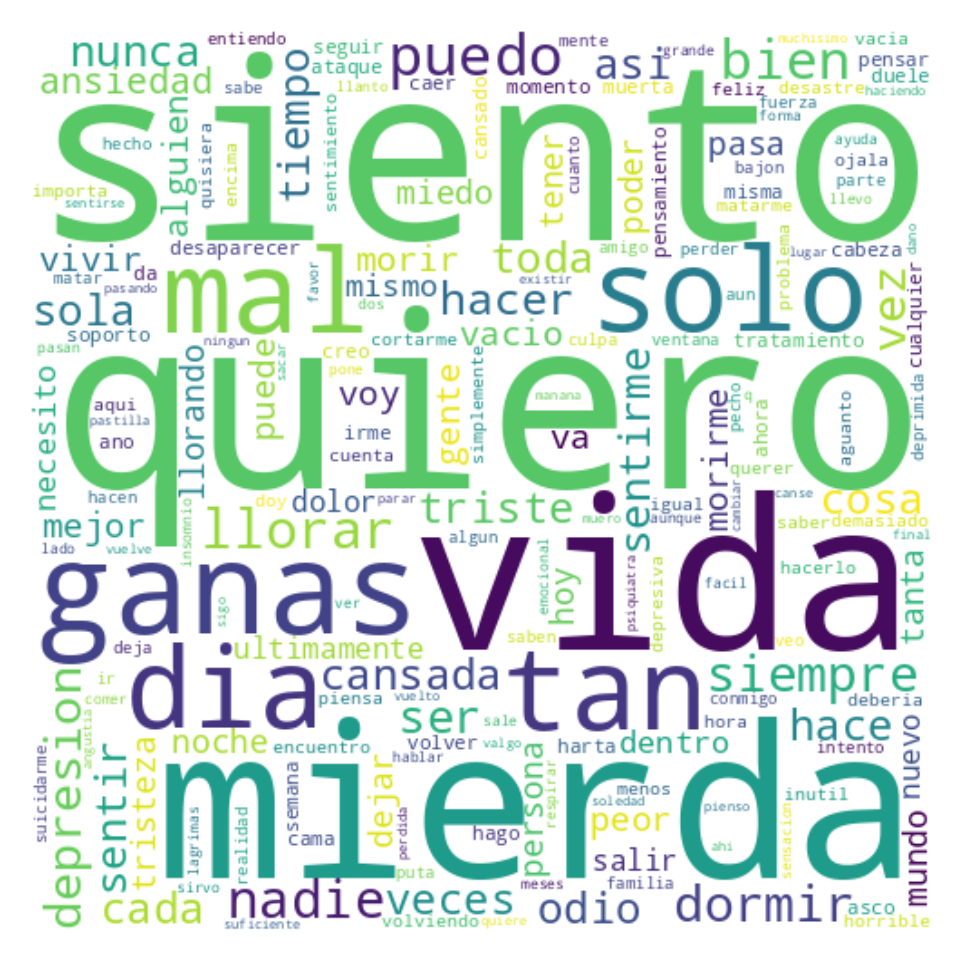

In [11]:
fig = plt.figure(dpi=300)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

fig.savefig('img/wordcloud.jpg',
            bbox_inches='tight',    
            dpi=300
            )

plt.close()


In [12]:
bow = pd.Series(text.split(' ')).value_counts()
bow_clean = {k: v for k, v in bow.items() if k not in swn}
del bow_clean['']

In [13]:
for i, (k, v) in enumerate(bow_clean.items()):
    if i < 20:
        console.println(f'{i+1:>2} | {k:10} : {v:>4}')
    else:
        break

 1 | siento     :  115
 2 | quiero     :  109
 3 | vida       :   80
 4 | mierda     :   80
 5 | ganas      :   75
 6 | solo       :   74
 7 | mal        :   74
 8 | tan        :   72
 9 | puedo      :   63
10 | llorar     :   55
11 | bien       :   55
12 | nadie      :   51
13 | siempre    :   47
14 | dormir     :   46
15 | dia        :   45
16 | vez        :   44
17 | depresion  :   44
18 | ser        :   42
19 | hacer      :   39
20 | nunca      :   36


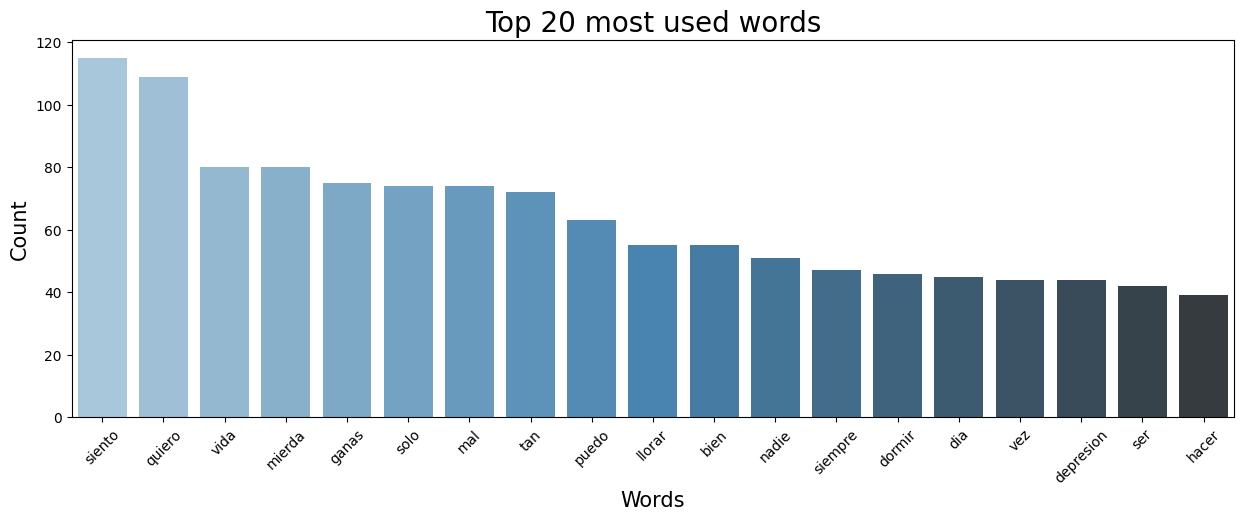

In [14]:
fig = plt.figure(figsize=(15, 5), dpi=100)

plt.xticks(rotation=45)
plt.xlabel('Words', fontsize=15)
plt.ylabel('Count', fontsize=15)

n = 19
x, y = list(bow_clean.keys())[:19],\
       list(bow_clean.values())[:19]

fig = sns.barplot(x=x,
                  y=y,
                  palette='Blues_d',
                  ).set_title(f'Top {n+1} most used words',
                              fontsize=20
                              )

plt.show()

fig.get_figure().savefig('img/top_20_words.jpg',
                         bbox_inches='tight',
                         dpi=200
                         )

plt.close()

## Hashtags Analysis

In [15]:
data['HASHTAGS'] = data['TWEET_TEXT'].apply(lambda x: re.findall(r'#\w+', x)).apply(lambda x: ' '.join(x))
data

,USER_ID_ANON,TWEET_TEXT,CREATED_AT,TWEET_TEXT_NORMALIZED,HASHTAGS
0,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017,deberian eliminar a las malas personas y a los...,
1,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017,ya deja de intentar contarle tus problemas a a...,
2,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017,la tristeza es lo mas facil de ocultar de todo...,#LaDepresiónEsMulticolor
3,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017,de las peores cosas de la depresion es que no ...,
4,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017,la soledad es lo unico constante en mi vida. c...,
...,...,...,...,...,...
995,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018,de nuevo vacio,
996,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018,soy gay soy gay soy gay soy gay soy putamente ...,
997,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017,cansado si muy cansado de todo de la gente y d...,
998,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018,la vida me mataa,


## Sentiment Analysis

In [16]:
sentiment_analyzer = SentimentAnalyzer(lang="es")

In [17]:
data['TWEET_TEXT_NORMALIZED_WITHOUT_HASHTAGS'] = data['TWEET_TEXT_NORMALIZED'].apply(lambda x: re.sub(r'#\w+', '', x).strip())
data['SENTIMENT_FULL_NORMALIZED'] = data['TWEET_TEXT_NORMALIZED_WITHOUT_HASHTAGS'].apply(lambda t: sentiment_analyzer.predict(t))
data['SENTIMENT_NORMALIZED'] = data['SENTIMENT_FULL_NORMALIZED'].apply(lambda t: t.output)
data['SENTIMENT_POS_PCT_NORMALIZED'] = data['SENTIMENT_FULL_NORMALIZED'].apply(lambda t: round(t.probas['POS'] * 100, 3))
data['SENTIMENT_NEG_PCT_NORMALIZED'] = data['SENTIMENT_FULL_NORMALIZED'].apply(lambda t: round(t.probas['NEG'] * 100, 3))
data['SENTIMENT_NEU_PCT_NORMALIZED'] = data['SENTIMENT_FULL_NORMALIZED'].apply(lambda t: round(t.probas['NEU'] * 100, 3))
del data['SENTIMENT_FULL_NORMALIZED']
data

,USER_ID_ANON,TWEET_TEXT,CREATED_AT,TWEET_TEXT_NORMALIZED,HASHTAGS,TWEET_TEXT_NORMALIZED_WITHOUT_HASHTAGS,SENTIMENT_NORMALIZED,SENTIMENT_POS_PCT_NORMALIZED,SENTIMENT_NEG_PCT_NORMALIZED,SENTIMENT_NEU_PCT_NORMALIZED
0,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017,deberian eliminar a las malas personas y a los...,,deberian eliminar a las malas personas y a los...,NEU,0.155,10.224,89.621
1,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017,ya deja de intentar contarle tus problemas a a...,,ya deja de intentar contarle tus problemas a a...,NEG,0.042,99.918,0.040
2,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017,la tristeza es lo mas facil de ocultar de todo...,#LaDepresiónEsMulticolor,la tristeza es lo mas facil de ocultar de todo...,NEG,0.037,99.816,0.147
3,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017,de las peores cosas de la depresion es que no ...,,de las peores cosas de la depresion es que no ...,NEG,0.038,99.906,0.056
4,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017,la soledad es lo unico constante en mi vida. c...,,la soledad es lo unico constante en mi vida. c...,NEG,0.086,99.810,0.104
...,...,...,...,...,...,...,...,...,...,...
995,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018,de nuevo vacio,,de nuevo vacio,NEU,0.062,1.085,98.853
996,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018,soy gay soy gay soy gay soy gay soy putamente ...,,soy gay soy gay soy gay soy gay soy putamente ...,NEG,0.042,99.917,0.041
997,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017,cansado si muy cansado de todo de la gente y d...,,cansado si muy cansado de todo de la gente y d...,NEG,0.042,99.930,0.028
998,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018,la vida me mataa,,la vida me mataa,NEG,0.033,99.940,0.027


In [18]:
data.groupby(['SENTIMENT_NORMALIZED'])['SENTIMENT_NORMALIZED'].count()

SENTIMENT_NORMALIZED
NEG    837
NEU    140
POS     23
Name: SENTIMENT_NORMALIZED, dtype: int64

In [19]:
data[data['SENTIMENT_NORMALIZED'] == 'POS']

,USER_ID_ANON,TWEET_TEXT,CREATED_AT,TWEET_TEXT_NORMALIZED,HASHTAGS,TWEET_TEXT_NORMALIZED_WITHOUT_HASHTAGS,SENTIMENT_NORMALIZED,SENTIMENT_POS_PCT_NORMALIZED,SENTIMENT_NEG_PCT_NORMALIZED,SENTIMENT_NEU_PCT_NORMALIZED
18,2,Que bueno sería despertar con autoestima,Fri May 11 02:07:01 +0000 2018,que bueno seria despertar con autoestima,,que bueno seria despertar con autoestima,POS,99.744,0.063,0.194
100,9,La soledad y la depresión han sido mis verdade...,Sun May 06 23:18:14 +0000 2018,la soledad y la depresion han sido mis verdade...,,la soledad y la depresion han sido mis verdade...,POS,99.384,0.104,0.512
163,14,Ya una vez quise dormir para siempre a través ...,Tue Aug 16 01:52:57 +0000 2016,ya una vez quise dormir para siempre a traves ...,,ya una vez quise dormir para siempre a traves ...,POS,99.818,0.061,0.121
178,16,No puedo parar de comer,Thu Oct 05 18:46:24 +0000 2017,no puedo parar de comer,,no puedo parar de comer,POS,99.318,0.397,0.285
180,16,No me puedo sentir tan mal 😥😭😭😭,Fri Sep 08 00:05:20 +0000 2017,no me puedo sentir tan mal,,no me puedo sentir tan mal,POS,98.080,0.194,1.726
288,25,Nunca me senti tan sola,Sun Jan 15 05:23:54 +0000 2017,nunca me senti tan sola,,nunca me senti tan sola,POS,88.396,10.567,1.037
318,27,Tantas ganas de cortarme. Quiero sacarme el do...,Mon Feb 19 22:40:56 +0000 2018,tantas ganas de cortarme. quiero sacarme el do...,,tantas ganas de cortarme. quiero sacarme el do...,POS,95.633,0.071,4.296
389,34,Porque hay días que tu mejor opción es irte a ...,Tue Jan 30 19:32:11 +0000 2018,porque hay dias que tu mejor opcion es irte a ...,,porque hay dias que tu mejor opcion es irte a ...,POS,80.974,0.040,18.985
423,37,Qué envidia que le tengo siempre a toda la gen...,Wed Dec 13 01:56:09 +0000 2017,que envidia que le tengo siempre a toda la gen...,,que envidia que le tengo siempre a toda la gen...,POS,98.129,1.717,0.154
447,39,Es increíble como puedo estar riéndome y a los...,Thu Feb 04 02:10:59 +0000 2016,es increible como puedo estar riendome y a los...,,es increible como puedo estar riendome y a los...,POS,98.562,1.204,0.235


In [20]:
data['SENTIMENT_FULL'] = data['TWEET_TEXT'].apply(lambda t: sentiment_analyzer.predict(t))
data['SENTIMENT'] = data['SENTIMENT_FULL'].apply(lambda t: t.output)
data['SENTIMENT_POS_PCT'] = data['SENTIMENT_FULL'].apply(lambda t: round(t.probas['POS'] * 100, 3))
data['SENTIMENT_NEG_PCT'] = data['SENTIMENT_FULL'].apply(lambda t: round(t.probas['NEG'] * 100, 3))
data['SENTIMENT_NEU_PCT'] = data['SENTIMENT_FULL'].apply(lambda t: round(t.probas['NEU'] * 100, 3))
del data['SENTIMENT_FULL']
data

,USER_ID_ANON,TWEET_TEXT,CREATED_AT,TWEET_TEXT_NORMALIZED,HASHTAGS,TWEET_TEXT_NORMALIZED_WITHOUT_HASHTAGS,SENTIMENT_NORMALIZED,SENTIMENT_POS_PCT_NORMALIZED,SENTIMENT_NEG_PCT_NORMALIZED,SENTIMENT_NEU_PCT_NORMALIZED,SENTIMENT,SENTIMENT_POS_PCT,SENTIMENT_NEG_PCT,SENTIMENT_NEU_PCT
0,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017,deberian eliminar a las malas personas y a los...,,deberian eliminar a las malas personas y a los...,NEU,0.155,10.224,89.621,NEG,0.178,74.836,24.986
1,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017,ya deja de intentar contarle tus problemas a a...,,ya deja de intentar contarle tus problemas a a...,NEG,0.042,99.918,0.040,NEG,0.056,99.892,0.052
2,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017,la tristeza es lo mas facil de ocultar de todo...,#LaDepresiónEsMulticolor,la tristeza es lo mas facil de ocultar de todo...,NEG,0.037,99.816,0.147,NEG,0.083,98.471,1.446
3,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017,de las peores cosas de la depresion es que no ...,,de las peores cosas de la depresion es que no ...,NEG,0.038,99.906,0.056,NEG,0.040,99.908,0.052
4,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017,la soledad es lo unico constante en mi vida. c...,,la soledad es lo unico constante en mi vida. c...,NEG,0.086,99.810,0.104,NEG,0.085,99.825,0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018,de nuevo vacio,,de nuevo vacio,NEU,0.062,1.085,98.853,NEG,0.046,99.847,0.107
996,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018,soy gay soy gay soy gay soy gay soy putamente ...,,soy gay soy gay soy gay soy gay soy putamente ...,NEG,0.042,99.917,0.041,NEG,0.052,99.919,0.029
997,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017,cansado si muy cansado de todo de la gente y d...,,cansado si muy cansado de todo de la gente y d...,NEG,0.042,99.930,0.028,NEG,0.047,99.918,0.035
998,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018,la vida me mataa,,la vida me mataa,NEG,0.033,99.940,0.027,NEG,0.064,99.614,0.321


In [21]:
data.groupby(['SENTIMENT'])['SENTIMENT'].count()

SENTIMENT
NEG    839
NEU    133
POS     28
Name: SENTIMENT, dtype: int64

In [22]:
data[data['SENTIMENT'] == 'POS']

,USER_ID_ANON,TWEET_TEXT,CREATED_AT,TWEET_TEXT_NORMALIZED,HASHTAGS,TWEET_TEXT_NORMALIZED_WITHOUT_HASHTAGS,SENTIMENT_NORMALIZED,SENTIMENT_POS_PCT_NORMALIZED,SENTIMENT_NEG_PCT_NORMALIZED,SENTIMENT_NEU_PCT_NORMALIZED,SENTIMENT,SENTIMENT_POS_PCT,SENTIMENT_NEG_PCT,SENTIMENT_NEU_PCT
18,2,Que bueno sería despertar con autoestima,Fri May 11 02:07:01 +0000 2018,que bueno seria despertar con autoestima,,que bueno seria despertar con autoestima,POS,99.744,0.063,0.194,POS,99.855,0.058,0.087
100,9,La soledad y la depresión han sido mis verdade...,Sun May 06 23:18:14 +0000 2018,la soledad y la depresion han sido mis verdade...,,la soledad y la depresion han sido mis verdade...,POS,99.384,0.104,0.512,POS,99.608,0.092,0.300
163,14,Ya una vez quise dormir para siempre a través ...,Tue Aug 16 01:52:57 +0000 2016,ya una vez quise dormir para siempre a traves ...,,ya una vez quise dormir para siempre a traves ...,POS,99.818,0.061,0.121,POS,99.813,0.059,0.128
178,16,No puedo parar de comer,Thu Oct 05 18:46:24 +0000 2017,no puedo parar de comer,,no puedo parar de comer,POS,99.318,0.397,0.285,POS,91.560,7.995,0.445
180,16,No me puedo sentir tan mal 😥😭😭😭,Fri Sep 08 00:05:20 +0000 2017,no me puedo sentir tan mal,,no me puedo sentir tan mal,POS,98.080,0.194,1.726,POS,98.092,0.120,1.788
318,27,Tantas ganas de cortarme. Quiero sacarme el do...,Mon Feb 19 22:40:56 +0000 2018,tantas ganas de cortarme. quiero sacarme el do...,,tantas ganas de cortarme. quiero sacarme el do...,POS,95.633,0.071,4.296,POS,95.962,0.101,3.936
389,34,Porque hay días que tu mejor opción es irte a ...,Tue Jan 30 19:32:11 +0000 2018,porque hay dias que tu mejor opcion es irte a ...,,porque hay dias que tu mejor opcion es irte a ...,POS,80.974,0.040,18.985,POS,98.909,0.026,1.065
394,35,"No, no estoy bien. Pero no lo he estado desde ...",Sat Feb 17 01:01:22 +0000 2018,"no, no estoy bien. pero no lo he estado desde ...",,"no, no estoy bien. pero no lo he estado desde ...",NEU,0.590,0.417,98.993,POS,50.787,1.915,47.298
422,37,Cómo me gustaría que en vez de regalarme algo ...,Sat Feb 24 18:56:22 +0000 2018,como me gustaria que en vez de regalarme algo ...,,como me gustaria que en vez de regalarme algo ...,NEU,0.623,0.180,99.196,POS,98.253,0.975,0.772
423,37,Qué envidia que le tengo siempre a toda la gen...,Wed Dec 13 01:56:09 +0000 2017,que envidia que le tengo siempre a toda la gen...,,que envidia que le tengo siempre a toda la gen...,POS,98.129,1.717,0.154,POS,99.431,0.500,0.068
